# Requirements

In [1]:
# Install chromium, its driver, and selenium.
!apt update
!apt install chromium-chromedriver
!pip install selenium

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [44.8 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,009 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,131 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy/main Sources [2,230 kB]
Get:12 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By

# Configuration

In [3]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

# Simple Usage

In [4]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [ ]:
# Navigate to a web page.
browser.get('https://www.apple.com/mk/')

In [ ]:
# Print the page source code.
print(browser.page_source)

In [ ]:
# Select an element from the page.
element = browser.find_element(By.CLASS_NAME, 'headline')

In [ ]:
# Print the element's innner text.
print(element.text)

# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping on the website https://books.toscrape.com/. Your task includes the extraction of book titles and prices for a minimum of 20 books from this website. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of book prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [8]:
# Write your code here. Add as many code boxes as you need.
browser.get("https://books.toscrape.com/")
raw_html = browser.page_source

In [37]:
prices = [float(p.text[1:]) for p in browser.find_elements(By.CSS_SELECTOR, 'p.price_color')]
products = [prod.find_element(By.CSS_SELECTOR, "h3 > a").get_attribute("title") for prod in browser.find_elements(By.CLASS_NAME, "product_pod")]


In [38]:
print(len(prices) == len(products))

True


In [48]:
import pandas as pd
matrix = []
for price, product in zip(prices, products):
  row = {}
  row["Title"] = product
  row["Price"] = price
  matrix.append(row)
df = pd.DataFrame(matrix)
df

,Title,Price
0,A Light in the Attic,51.77
1,Tipping the Velvet,53.74
2,Soumission,50.10
3,Sharp Objects,47.82
4,Sapiens: A Brief History of Humankind,54.23
5,The Requiem Red,22.65
6,The Dirty Little Secrets of Getting Your Dream...,33.34
7,The Coming Woman: A Novel Based on the Life of...,17.93
8,The Boys in the Boat: Nine Americans and Their...,22.60
9,The Black Maria,52.15


<Axes: >

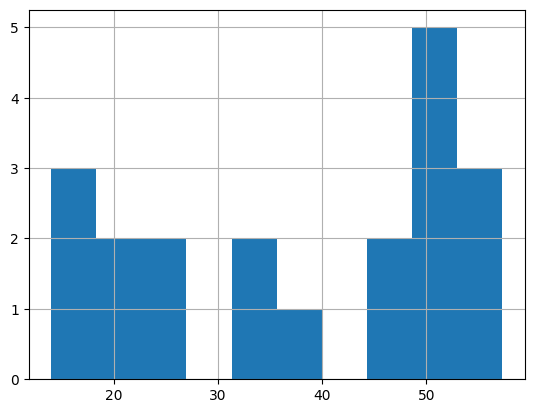

In [49]:
df["Price"].hist()

# Laboratory Exercise - Bonus Task (+ 2 points)

As an additional task, you will need to click on each book listed on the page, proceed to the individual page for each book, and extract the quantity of available copies. Subsequently, you are required to compute both the mean and standard deviation of the quantities of these books.

## Hints
- To click on a specific `element` on a web page use `element.click()`.
- To navigate back to the previous page use `browser.back()`.

## Solution

In [91]:
browser.get("https://books.toscrape.com/")

In [92]:
links = [prod.find_element(By.CSS_SELECTOR, "h3 > a") for prod in browser.find_elements(By.CLASS_NAME, "product_pod")]


In [93]:
links
import time

In [94]:
hrefs = []
for link in links:
  hrefs.append(link.get_attribute('href'))
hrefs

['https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
 'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
 'https://books.toscrape.com/catalogue/soumission_998/index.html',
 'https://books.toscrape.com/catalogue/sharp-objects_997/index.html',
 'https://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html',
 'https://books.toscrape.com/catalogue/the-requiem-red_995/index.html',
 'https://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html',
 'https://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html',
 'https://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html',
 'https://books.toscrape.com/catalogue/the-black-maria_991/index.html',
 'https://books.toscrape.com/catalogue/starving-hearts-triangular-trade-tr

In [109]:
stock = []
for href in hrefs:
  browser.get(href)
  stock_text = browser.find_elements(By.CSS_SELECTOR, "p.instock")[0].text
  s = stock_text.split(" ")[2]
  stock.append(int(s[1:]))
stock

[22,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19]

In [111]:
matrix = []
for i in range (len(stock)):
  row = {}
  row['Title'] = products[i]
  row['Stock'] = stock[i]
  matrix.append(row)
df = pd.DataFrame(matrix)
df

,Title,Stock
0,A Light in the Attic,22
1,Tipping the Velvet,20
2,Soumission,20
3,Sharp Objects,20
4,Sapiens: A Brief History of Humankind,20
5,The Requiem Red,19
6,The Dirty Little Secrets of Getting Your Dream...,19
7,The Coming Woman: A Novel Based on the Life of...,19
8,The Boys in the Boat: Nine Americans and Their...,19
9,The Black Maria,19


In [114]:
print(df['Stock'].mean())
print(df['Stock'].min())
print(df['Stock'].max())
print(df['Stock'].std())

19.35
19
22
0.7451598203705946
